# Análise de Demanda e Estoque - PharmaSense AI

Este notebook contém análises detalhadas de demanda e estoque, incluindo:
- Análise de demanda diária por região e estado
- Análise de estoque e reabastecimento
- Análise de stock out e demanda não atendida
- Métricas de atendimento e nível de serviço
- Análise temporal de estoque
- Identificação de padrões e tendências de demanda


## 1. Importação de Bibliotecas e Carregamento de Dados


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuração de visualização
plt.style.use('dark_background')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)


In [20]:
# Carregar dados de demanda e estoque
df = pd.read_csv('assets/demanda_estoque.csv')
df['Data'] = pd.to_datetime(df['Data'])

print(f"Total de registros: {len(df):,}")
print(f"Período: {df['Data'].min().date()} a {df['Data'].max().date()}")
print(f"\nColunas: {list(df.columns)}")
print(f"\nPrimeiras linhas:")
df.head()


Total de registros: 27,029
Período: 2020-02-25 a 2023-03-18

Colunas: ['Data', 'Estado', 'Regiao', 'Demanda_Diaria', 'Entregas_Concluidas', 'Entregas_Atrasadas', 'Custo_Total_USD', 'Custo_Medio_USD', 'Emissao_Total_CO2_kg', 'Emissao_Media_CO2_kg', 'Tempo_Medio_Entrega_Dias', 'Tempo_Previsto_Medio_Dias', 'Estoque_Inicial', 'Estoque_Disponivel', 'Estoque_Final', 'Reabastecimento', 'Reabastecimento_Chegando', 'Stock_Out', 'Demanda_Atendida', 'Demanda_Nao_Atendida', 'Taxa_Atendimento', 'Nivel_Servico', 'Dias_Estoque_Restante', 'Ponto_Reposicao', 'Indicador_Estoque_Baixo', 'Indicador_Stock_Out', 'Demanda_Acumulada', 'Stock_Out_Acumulado', 'Custo_Total_Acumulado']

Primeiras linhas:


,Data,Estado,Regiao,Demanda_Diaria,Entregas_Concluidas,Entregas_Atrasadas,Custo_Total_USD,Custo_Medio_USD,Emissao_Total_CO2_kg,Emissao_Media_CO2_kg,Tempo_Medio_Entrega_Dias,Tempo_Previsto_Medio_Dias,Estoque_Inicial,Estoque_Disponivel,Estoque_Final,Reabastecimento,Reabastecimento_Chegando,Stock_Out,Demanda_Atendida,Demanda_Nao_Atendida,Taxa_Atendimento,Nivel_Servico,Dias_Estoque_Restante,Ponto_Reposicao,Indicador_Estoque_Baixo,Indicador_Stock_Out,Demanda_Acumulada,Stock_Out_Acumulado,Custo_Total_Acumulado
0,2020-03-17,AC,Norte,3,2,0,767.53,383.76,150.84,75.42,4.23,5.48,39,39,36,0,0,0,3,0,100.00,100.00,12.00,7,0,0,3,0,767.53
1,2020-03-19,AC,Norte,1,1,0,384.83,384.83,78.85,78.85,4.44,4.96,36,36,35,0,0,0,1,0,100.00,100.00,35.00,7,0,0,4,0,"1,152.36"
2,2020-03-20,AC,Norte,1,1,0,395.09,395.09,79.44,79.44,5.16,6.16,35,35,34,0,0,0,1,0,100.00,100.00,34.00,7,0,0,5,0,"1,547.45"
3,2020-03-21,AC,Norte,2,2,0,695.54,347.77,160.61,80.31,4.82,5.76,34,34,32,0,0,0,2,0,100.00,100.00,16.00,7,0,0,7,0,"2,242.99"
4,2020-03-22,AC,Norte,2,2,0,771.64,385.82,141.79,70.90,4.93,5.61,32,32,30,0,0,0,2,0,100.00,100.00,15.00,7,0,0,9,0,"3,014.63"


## 2. Análise Exploratória Inicial


In [21]:
# Informações gerais
print("Informações do DataFrame:")
print(df.info())
print("\n" + "="*50)
print("\nEstatísticas Descritivas:")
df.describe()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27029 entries, 0 to 27028
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Data                       27029 non-null  datetime64[ns]
 1   Estado                     27029 non-null  object        
 2   Regiao                     27029 non-null  object        
 3   Demanda_Diaria             27029 non-null  int64         
 4   Entregas_Concluidas        27029 non-null  int64         
 5   Entregas_Atrasadas         27029 non-null  int64         
 6   Custo_Total_USD            27029 non-null  float64       
 7   Custo_Medio_USD            27029 non-null  float64       
 8   Emissao_Total_CO2_kg       27029 non-null  float64       
 9   Emissao_Media_CO2_kg       27029 non-null  float64       
 10  Tempo_Medio_Entrega_Dias   27029 non-null  float64       
 11  Tempo_Previsto_Medio_Dias  27029 non-null

,Data,Demanda_Diaria,Entregas_Concluidas,Entregas_Atrasadas,Custo_Total_USD,Custo_Medio_USD,Emissao_Total_CO2_kg,Emissao_Media_CO2_kg,Tempo_Medio_Entrega_Dias,Tempo_Previsto_Medio_Dias,Estoque_Inicial,Estoque_Disponivel,Estoque_Final,Reabastecimento,Reabastecimento_Chegando,Stock_Out,Demanda_Atendida,Demanda_Nao_Atendida,Taxa_Atendimento,Nivel_Servico,Dias_Estoque_Restante,Ponto_Reposicao,Indicador_Estoque_Baixo,Indicador_Stock_Out,Demanda_Acumulada,Stock_Out_Acumulado,Custo_Total_Acumulado
count,27029,"27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00","27,029.00"
mean,2021-08-20 03:29:51.276037120,11.20,10.67,0.06,"2,087.09",226.21,445.81,49.03,2.46,3.20,126.54,136.20,126.52,9.67,9.66,1.52,9.68,1.52,92.04,92.04,37.37,33.22,0.18,0.09,"5,898.51",802.34,"1,112,622.36"
min,2020-02-25 00:00:00,1.00,0.00,0.00,52.42,52.42,17.43,17.43,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00,0.00,0.00,1.00,0.00,132.89
25%,2020-11-29 00:00:00,2.00,2.00,0.00,392.78,156.24,90.26,34.73,1.57,2.22,33.00,40.00,33.00,0.00,0.00,0.00,1.00,0.00,100.00,100.00,4.70,17.00,0.00,0.00,"1,632.00",202.00,"380,158.22"
50%,2021-08-10 00:00:00,5.00,5.00,0.00,"1,154.39",195.67,256.86,44.72,2.11,2.78,86.00,96.00,86.00,0.00,0.00,0.00,4.00,0.00,100.00,100.00,15.29,28.00,0.00,0.00,"4,089.00",600.00,"848,229.88"
75%,2022-05-05 00:00:00,15.00,15.00,0.00,"3,119.80",315.66,662.45,68.80,3.25,4.14,178.00,190.00,178.00,0.00,0.00,0.00,13.00,0.00,100.00,100.00,43.00,51.00,0.00,0.00,"8,565.00","1,275.00","1,706,515.52"
max,2023-03-18 00:00:00,99.00,47.00,7.00,"17,905.09",457.81,"3,292.09",88.07,5.91,6.77,842.00,851.00,842.00,172.00,438.00,94.00,99.00,94.00,100.00,100.00,783.00,86.00,1.00,1.00,"29,891.00","3,086.00","3,850,666.24"
std,NaN,13.40,11.84,0.36,"2,230.10",93.63,463.28,17.11,1.10,1.29,128.55,133.06,128.59,28.74,29.59,6.54,12.61,6.54,26.28,26.28,60.41,21.35,0.38,0.29,"5,715.80",728.10,"923,461.29"


In [22]:
# Resumo estatístico das métricas principais
print("="*60)
print("RESUMO ESTATÍSTICO - DEMANDA E ESTOQUE")
print("="*60)

metricas = ['Demanda_Diaria', 'Estoque_Final', 'Stock_Out', 
            'Demanda_Atendida', 'Taxa_Atendimento', 'Nivel_Servico']

for metrica in metricas:
    print(f"\n{metrica}:")
    print(f"  • Média: {df[metrica].mean():.2f}")
    print(f"  • Mediana: {df[metrica].median():.2f}")
    print(f"  • Desvio Padrão: {df[metrica].std():.2f}")
    print(f"  • Mínimo: {df[metrica].min():.2f}")
    print(f"  • Máximo: {df[metrica].max():.2f}")


RESUMO ESTATÍSTICO - DEMANDA E ESTOQUE

Demanda_Diaria:
  • Média: 11.20
  • Mediana: 5.00
  • Desvio Padrão: 13.40
  • Mínimo: 1.00
  • Máximo: 99.00

Estoque_Final:
  • Média: 126.52
  • Mediana: 86.00
  • Desvio Padrão: 128.59
  • Mínimo: 0.00
  • Máximo: 842.00

Stock_Out:
  • Média: 1.52
  • Mediana: 0.00
  • Desvio Padrão: 6.54
  • Mínimo: 0.00
  • Máximo: 94.00

Demanda_Atendida:
  • Média: 9.68
  • Mediana: 4.00
  • Desvio Padrão: 12.61
  • Mínimo: 0.00
  • Máximo: 99.00

Taxa_Atendimento:
  • Média: 92.04
  • Mediana: 100.00
  • Desvio Padrão: 26.28
  • Mínimo: 0.00
  • Máximo: 100.00

Nivel_Servico:
  • Média: 92.04
  • Mediana: 100.00
  • Desvio Padrão: 26.28
  • Mínimo: 0.00
  • Máximo: 100.00


## 3. Análise de Demanda


In [23]:
# Demanda média por região
demanda_por_regiao = df.groupby('Regiao').agg({
    'Demanda_Diaria': ['sum', 'mean', 'std'],
    'Demanda_Atendida': 'sum',
    'Demanda_Nao_Atendida': 'sum'
}).round(2)

demanda_por_regiao.columns = ['Demanda_Total', 'Demanda_Media_Diaria', 'Desvio_Padrao',
                               'Demanda_Atendida_Total', 'Demanda_Nao_Atendida_Total']

print("Demanda por Região:")
print(demanda_por_regiao.sort_values('Demanda_Total', ascending=False))


Demanda por Região:
              Demanda_Total  Demanda_Media_Diaria  Desvio_Padrao  \
Regiao                                                             
Sudeste               86339                 21.24          17.01   
Nordeste              76044                  8.45          10.62   
Sul                   61448                 19.18          15.98   
Centro-Oeste          44027                 11.20          12.14   
Norte                 34781                  5.09           6.97   

              Demanda_Atendida_Total  Demanda_Nao_Atendida_Total  
Regiao                                                            
Sudeste                        76457                        9882  
Nordeste                       64344                       11700  
Sul                            53844                        7604  
Centro-Oeste                   37935                        6092  
Norte                          28984                        5797  


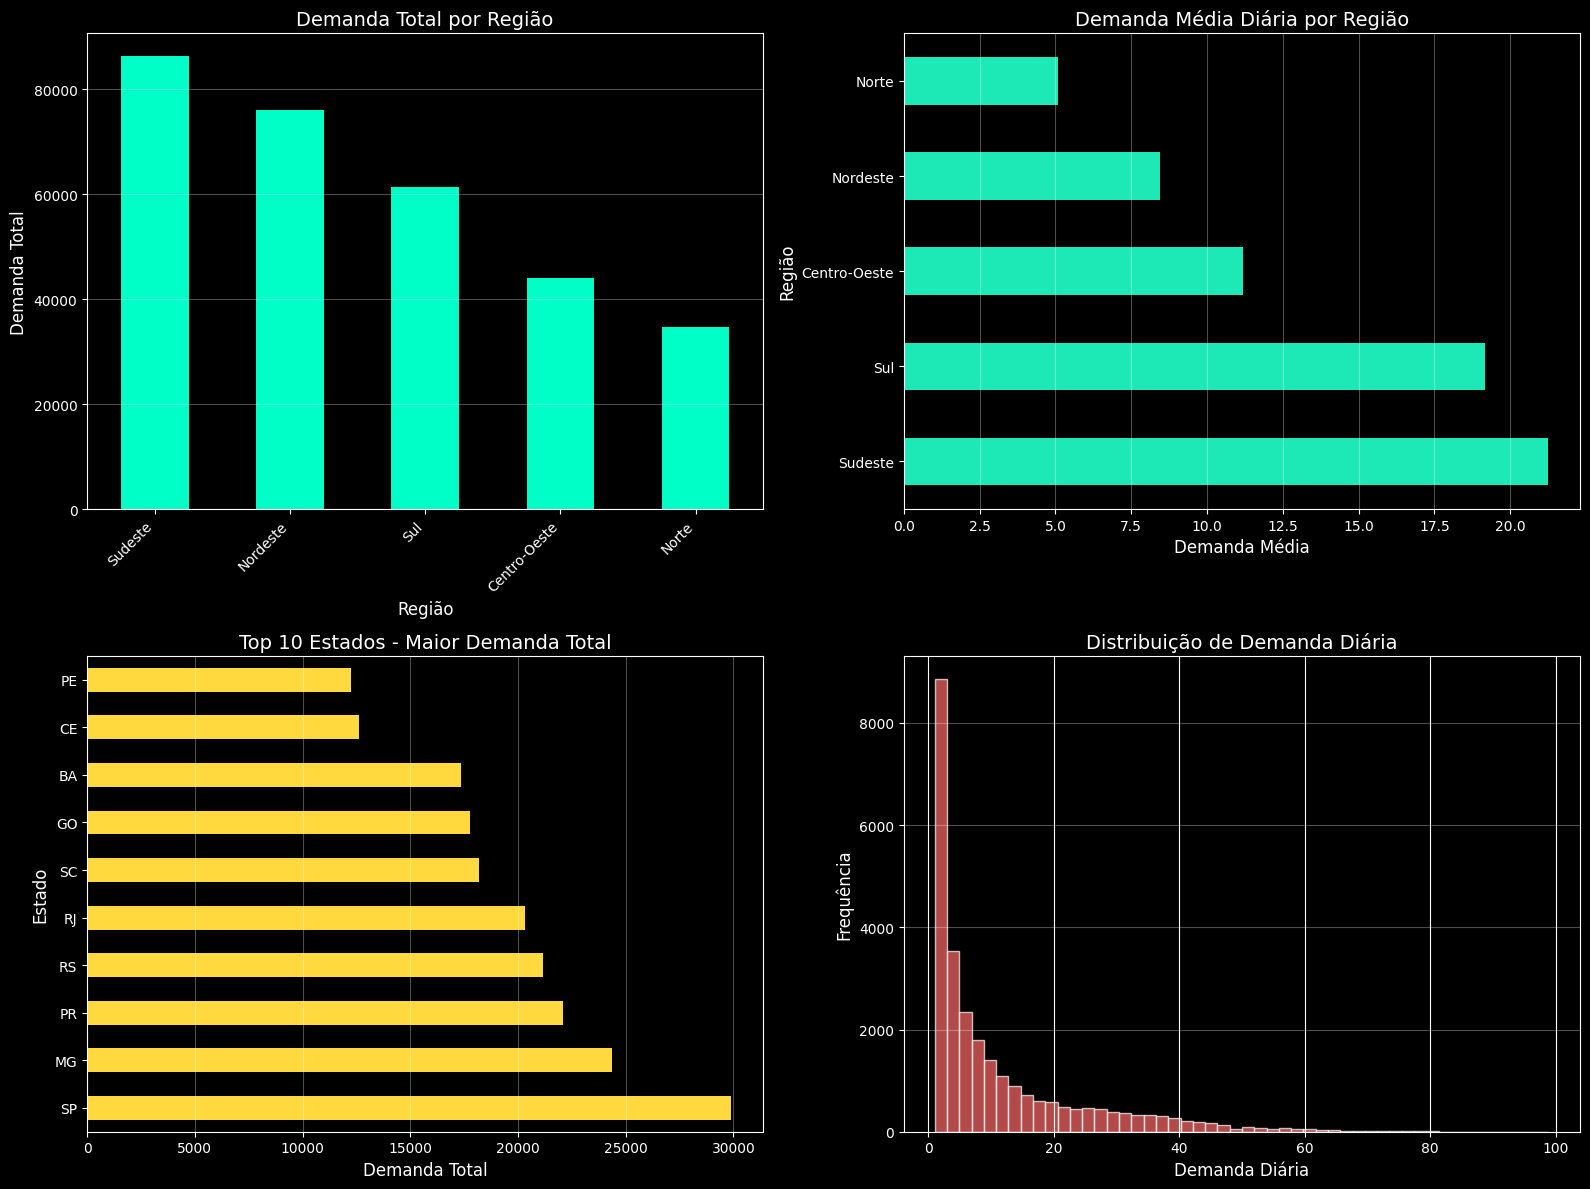

In [24]:
# Visualização: Demanda por região
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Demanda total por região
ax1 = axes[0, 0]
demanda_total = df.groupby('Regiao')['Demanda_Diaria'].sum().sort_values(ascending=False)
demanda_total.plot(kind='bar', ax=ax1, color='#00FFC6')
ax1.set_title('Demanda Total por Região', fontsize=14, color='white')
ax1.set_xlabel('Região', fontsize=12, color='white')
ax1.set_ylabel('Demanda Total', fontsize=12, color='white')
ax1.tick_params(colors='white')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.grid(alpha=0.3, axis='y')

# Gráfico 2: Demanda média diária por região
ax2 = axes[0, 1]
demanda_media = df.groupby('Regiao')['Demanda_Diaria'].mean().sort_values(ascending=False)
demanda_media.plot(kind='barh', ax=ax2, color='#1DE9B6')
ax2.set_title('Demanda Média Diária por Região', fontsize=14, color='white')
ax2.set_xlabel('Demanda Média', fontsize=12, color='white')
ax2.set_ylabel('Região', fontsize=12, color='white')
ax2.tick_params(colors='white')
ax2.grid(alpha=0.3, axis='x')

# Gráfico 3: Top 10 estados com maior demanda
ax3 = axes[1, 0]
demanda_estado = df.groupby('Estado')['Demanda_Diaria'].sum().sort_values(ascending=False).head(10)
demanda_estado.plot(kind='barh', ax=ax3, color='#FFD93D')
ax3.set_title('Top 10 Estados - Maior Demanda Total', fontsize=14, color='white')
ax3.set_xlabel('Demanda Total', fontsize=12, color='white')
ax3.set_ylabel('Estado', fontsize=12, color='white')
ax3.tick_params(colors='white')
ax3.grid(alpha=0.3, axis='x')

# Gráfico 4: Distribuição de demanda diária
ax4 = axes[1, 1]
df['Demanda_Diaria'].hist(bins=50, ax=ax4, color='#FF6B6B', alpha=0.7, edgecolor='white')
ax4.set_title('Distribuição de Demanda Diária', fontsize=14, color='white')
ax4.set_xlabel('Demanda Diária', fontsize=12, color='white')
ax4.set_ylabel('Frequência', fontsize=12, color='white')
ax4.tick_params(colors='white')
ax4.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 4. Análise de Estoque


In [25]:
# Estoque médio por região
estoque_por_regiao = df.groupby('Regiao').agg({
    'Estoque_Inicial': 'mean',
    'Estoque_Final': 'mean',
    'Reabastecimento': 'sum',
    'Indicador_Estoque_Baixo': 'sum'
}).round(2)

estoque_por_regiao.columns = ['Estoque_Inicial_Medio', 'Estoque_Final_Medio',
                               'Total_Reabastecimentos', 'Dias_Estoque_Baixo']

print("Análise de Estoque por Região:")
print(estoque_por_regiao.sort_values('Estoque_Final_Medio', ascending=False))


Análise de Estoque por Região:
              Estoque_Inicial_Medio  Estoque_Final_Medio  \
Regiao                                                     
Sudeste                      233.72               233.66   
Sul                          224.32               224.43   
Centro-Oeste                 125.59               125.50   
Nordeste                      94.93                94.92   
Norte                         59.14                59.11   

              Total_Reabastecimentos  Dias_Estoque_Baixo  
Regiao                                                    
Sudeste                        76208                 728  
Sul                            54207                 571  
Centro-Oeste                   37582                 706  
Nordeste                       64513                1582  
Norte                          28799                1208  


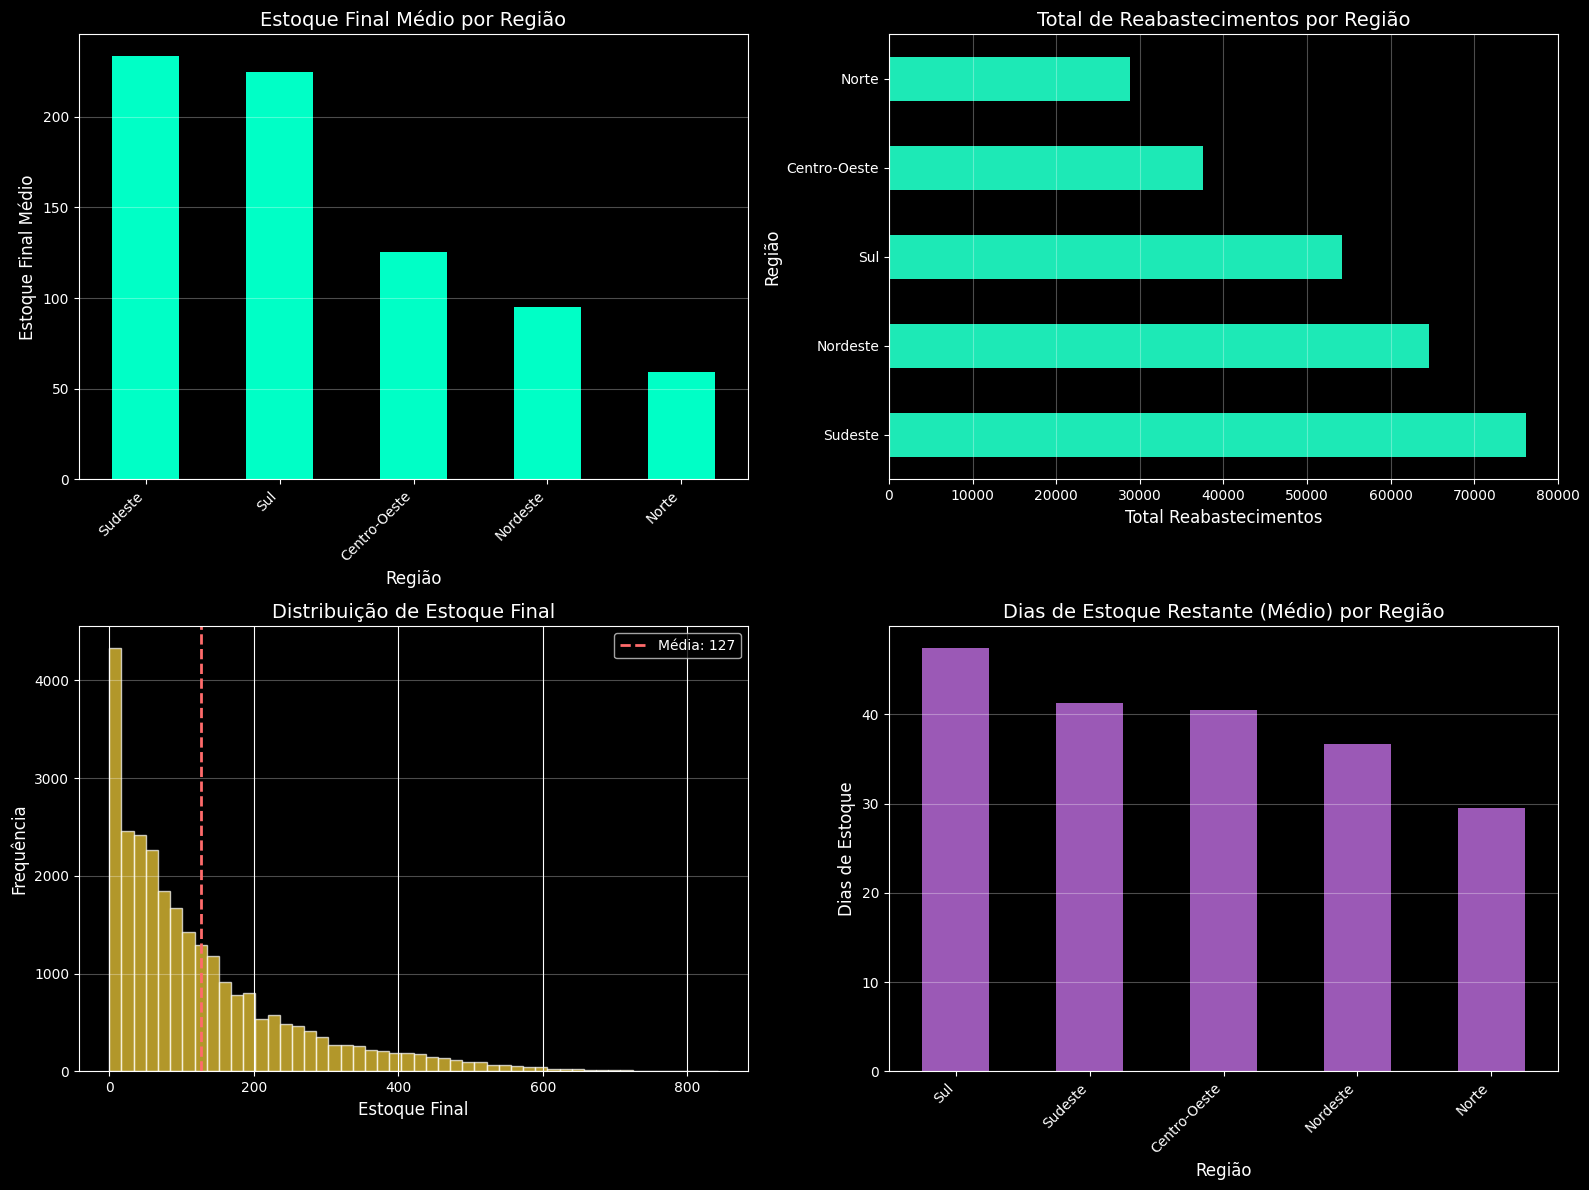

In [26]:
# Visualização: Análise de estoque
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Estoque médio final por região
ax1 = axes[0, 0]
estoque_final_medio = df.groupby('Regiao')['Estoque_Final'].mean().sort_values(ascending=False)
estoque_final_medio.plot(kind='bar', ax=ax1, color='#00FFC6')
ax1.set_title('Estoque Final Médio por Região', fontsize=14, color='white')
ax1.set_xlabel('Região', fontsize=12, color='white')
ax1.set_ylabel('Estoque Final Médio', fontsize=12, color='white')
ax1.tick_params(colors='white')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.grid(alpha=0.3, axis='y')

# Gráfico 2: Total de reabastecimentos por região
ax2 = axes[0, 1]
reabastecimentos = df.groupby('Regiao')['Reabastecimento'].sum().sort_values(ascending=False)
reabastecimentos.plot(kind='barh', ax=ax2, color='#1DE9B6')
ax2.set_title('Total de Reabastecimentos por Região', fontsize=14, color='white')
ax2.set_xlabel('Total Reabastecimentos', fontsize=12, color='white')
ax2.set_ylabel('Região', fontsize=12, color='white')
ax2.tick_params(colors='white')
ax2.grid(alpha=0.3, axis='x')

# Gráfico 3: Distribuição de estoque final
ax3 = axes[1, 0]
df['Estoque_Final'].hist(bins=50, ax=ax3, color='#FFD93D', alpha=0.7, edgecolor='white')
ax3.axvline(df['Estoque_Final'].mean(), color='#FF6B6B', linestyle='--', linewidth=2, label=f'Média: {df["Estoque_Final"].mean():.0f}')
ax3.set_title('Distribuição de Estoque Final', fontsize=14, color='white')
ax3.set_xlabel('Estoque Final', fontsize=12, color='white')
ax3.set_ylabel('Frequência', fontsize=12, color='white')
ax3.tick_params(colors='white')
ax3.legend()
ax3.grid(alpha=0.3, axis='y')

# Gráfico 4: Dias de estoque restante por região
ax4 = axes[1, 1]
# Filtrar valores infinitos para visualização
dias_estoque = df[df['Dias_Estoque_Restante'] != np.inf].copy()
dias_estoque_medio = dias_estoque.groupby('Regiao')['Dias_Estoque_Restante'].mean().sort_values(ascending=False)
dias_estoque_medio.plot(kind='bar', ax=ax4, color='#9B59B6')
ax4.set_title('Dias de Estoque Restante (Médio) por Região', fontsize=14, color='white')
ax4.set_xlabel('Região', fontsize=12, color='white')
ax4.set_ylabel('Dias de Estoque', fontsize=12, color='white')
ax4.tick_params(colors='white')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax4.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 5. Análise de Stock Out


In [27]:
# Análise de stock out
print("="*60)
print("ANÁLISE DE STOCK OUT")
print("="*60)

total_stock_out = df['Stock_Out'].sum()
total_demanda = df['Demanda_Diaria'].sum()
percentual_stock_out = (total_stock_out / total_demanda * 100) if total_demanda > 0 else 0

print(f"\n📊 Estatísticas Gerais:")
print(f"  • Stock out total: {total_stock_out:,.0f} unidades")
print(f"  • Demanda total: {total_demanda:,.0f} unidades")
print(f"  • Percentual de stock out: {percentual_stock_out:.2f}%")
print(f"  • Dias com stock out: {(df['Indicador_Stock_Out'] == 1).sum():,} dias")
print(f"  • Percentual de dias com stock out: {(df['Indicador_Stock_Out'] == 1).sum() / len(df) * 100:.2f}%")

# Stock out por região
stock_out_regiao = df.groupby('Regiao').agg({
    'Stock_Out': 'sum',
    'Indicador_Stock_Out': 'sum',
    'Demanda_Diaria': 'sum'
}).round(2)
stock_out_regiao['Percentual_Stock_Out'] = (stock_out_regiao['Stock_Out'] / stock_out_regiao['Demanda_Diaria'] * 100).round(2)
stock_out_regiao.columns = ['Stock_Out_Total', 'Dias_Stock_Out', 'Demanda_Total', 'Percentual_Stock_Out']

print(f"\n📊 Stock Out por Região:")
print(stock_out_regiao.sort_values('Stock_Out_Total', ascending=False))


ANÁLISE DE STOCK OUT

📊 Estatísticas Gerais:
  • Stock out total: 41,075 unidades
  • Demanda total: 302,639 unidades
  • Percentual de stock out: 13.57%
  • Dias com stock out: 2,482 dias
  • Percentual de dias com stock out: 9.18%

📊 Stock Out por Região:
              Stock_Out_Total  Dias_Stock_Out  Demanda_Total  \
Regiao                                                         
Nordeste                11700             809          76044   
Sudeste                  9882             386          86339   
Sul                      7604             309          61448   
Centro-Oeste             6092             388          44027   
Norte                    5797             590          34781   

              Percentual_Stock_Out  
Regiao                              
Nordeste                     15.39  
Sudeste                      11.45  
Sul                          12.37  
Centro-Oeste                 13.84  
Norte                        16.67  


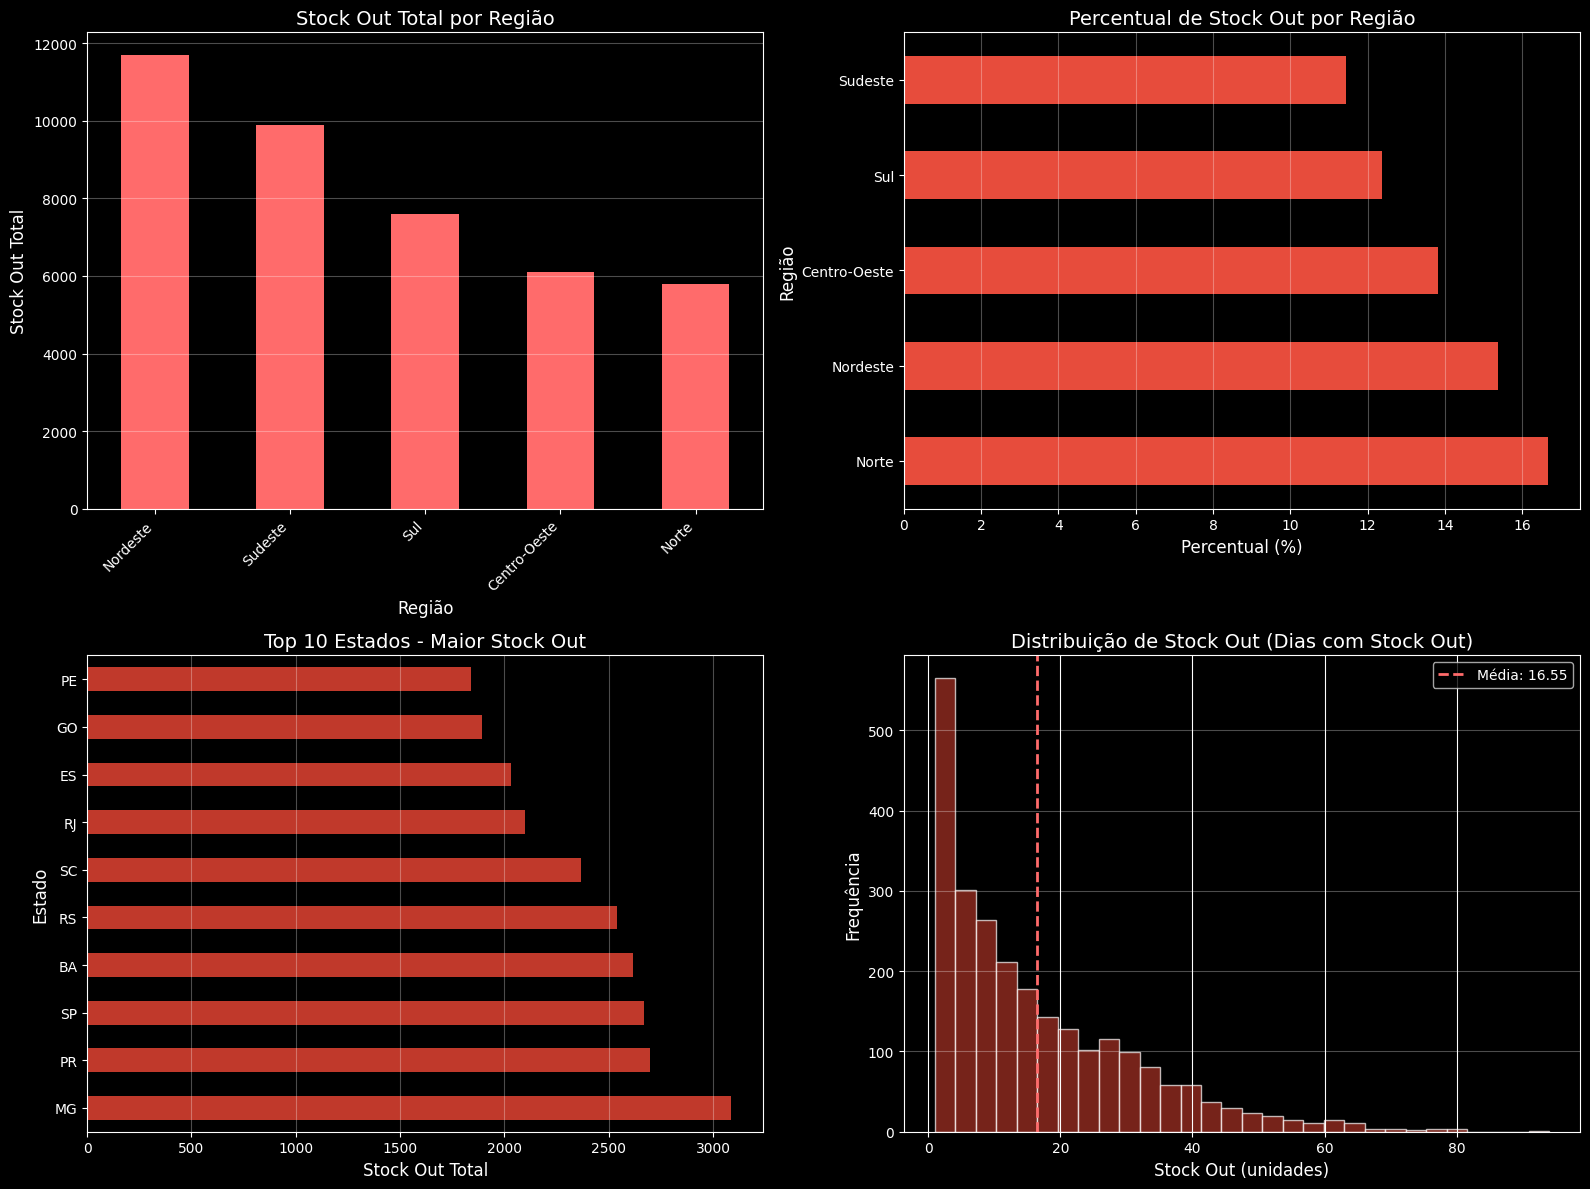

In [28]:
# Visualização: Análise de stock out
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Stock out total por região
ax1 = axes[0, 0]
stock_out_total = df.groupby('Regiao')['Stock_Out'].sum().sort_values(ascending=False)
stock_out_total.plot(kind='bar', ax=ax1, color='#FF6B6B')
ax1.set_title('Stock Out Total por Região', fontsize=14, color='white')
ax1.set_xlabel('Região', fontsize=12, color='white')
ax1.set_ylabel('Stock Out Total', fontsize=12, color='white')
ax1.tick_params(colors='white')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.grid(alpha=0.3, axis='y')

# Gráfico 2: Percentual de stock out por região
ax2 = axes[0, 1]
stock_out_pct = df.groupby('Regiao').apply(
    lambda x: (x['Stock_Out'].sum() / x['Demanda_Diaria'].sum() * 100) if x['Demanda_Diaria'].sum() > 0 else 0
).sort_values(ascending=False)
stock_out_pct.plot(kind='barh', ax=ax2, color='#E74C3C')
ax2.set_title('Percentual de Stock Out por Região', fontsize=14, color='white')
ax2.set_xlabel('Percentual (%)', fontsize=12, color='white')
ax2.set_ylabel('Região', fontsize=12, color='white')
ax2.tick_params(colors='white')
ax2.grid(alpha=0.3, axis='x')

# Gráfico 3: Top 10 estados com maior stock out
ax3 = axes[1, 0]
stock_out_estado = df.groupby('Estado')['Stock_Out'].sum().sort_values(ascending=False).head(10)
stock_out_estado.plot(kind='barh', ax=ax3, color='#C0392B')
ax3.set_title('Top 10 Estados - Maior Stock Out', fontsize=14, color='white')
ax3.set_xlabel('Stock Out Total', fontsize=12, color='white')
ax3.set_ylabel('Estado', fontsize=12, color='white')
ax3.tick_params(colors='white')
ax3.grid(alpha=0.3, axis='x')

# Gráfico 4: Distribuição de stock out (apenas dias com stock out)
ax4 = axes[1, 1]
stock_out_dias = df[df['Stock_Out'] > 0]['Stock_Out']
if len(stock_out_dias) > 0:
    stock_out_dias.hist(bins=30, ax=ax4, color='#A93226', alpha=0.7, edgecolor='white')
    ax4.axvline(stock_out_dias.mean(), color='#FF6B6B', linestyle='--', linewidth=2, 
                label=f'Média: {stock_out_dias.mean():.2f}')
    ax4.set_title('Distribuição de Stock Out (Dias com Stock Out)', fontsize=14, color='white')
    ax4.set_xlabel('Stock Out (unidades)', fontsize=12, color='white')
    ax4.set_ylabel('Frequência', fontsize=12, color='white')
    ax4.tick_params(colors='white')
    ax4.legend()
    ax4.grid(alpha=0.3, axis='y')
else:
    ax4.text(0.5, 0.5, 'Nenhum stock out registrado', 
             ha='center', va='center', fontsize=14, color='white', transform=ax4.transAxes)
    ax4.set_title('Distribuição de Stock Out', fontsize=14, color='white')

plt.tight_layout()
plt.show()


## 6. Análise de Atendimento e Nível de Serviço


In [29]:
# Análise de atendimento
atendimento_regiao = df.groupby('Regiao').agg({
    'Taxa_Atendimento': 'mean',
    'Nivel_Servico': 'mean',
    'Demanda_Atendida': 'sum',
    'Demanda_Nao_Atendida': 'sum'
}).round(2)

atendimento_regiao.columns = ['Taxa_Atendimento_Media', 'Nivel_Servico_Medio',
                              'Demanda_Atendida_Total', 'Demanda_Nao_Atendida_Total']

print("Análise de Atendimento por Região:")
print(atendimento_regiao.sort_values('Taxa_Atendimento_Media', ascending=False))


Análise de Atendimento por Região:
              Taxa_Atendimento_Media  Nivel_Servico_Medio  \
Regiao                                                      
Norte                          92.46                92.46   
Nordeste                       92.15                92.15   
Sudeste                        91.80                91.80   
Centro-Oeste                   91.65                91.65   
Sul                            91.59                91.59   

              Demanda_Atendida_Total  Demanda_Nao_Atendida_Total  
Regiao                                                            
Norte                          28984                        5797  
Nordeste                       64344                       11700  
Sudeste                        76457                        9882  
Centro-Oeste                   37935                        6092  
Sul                            53844                        7604  


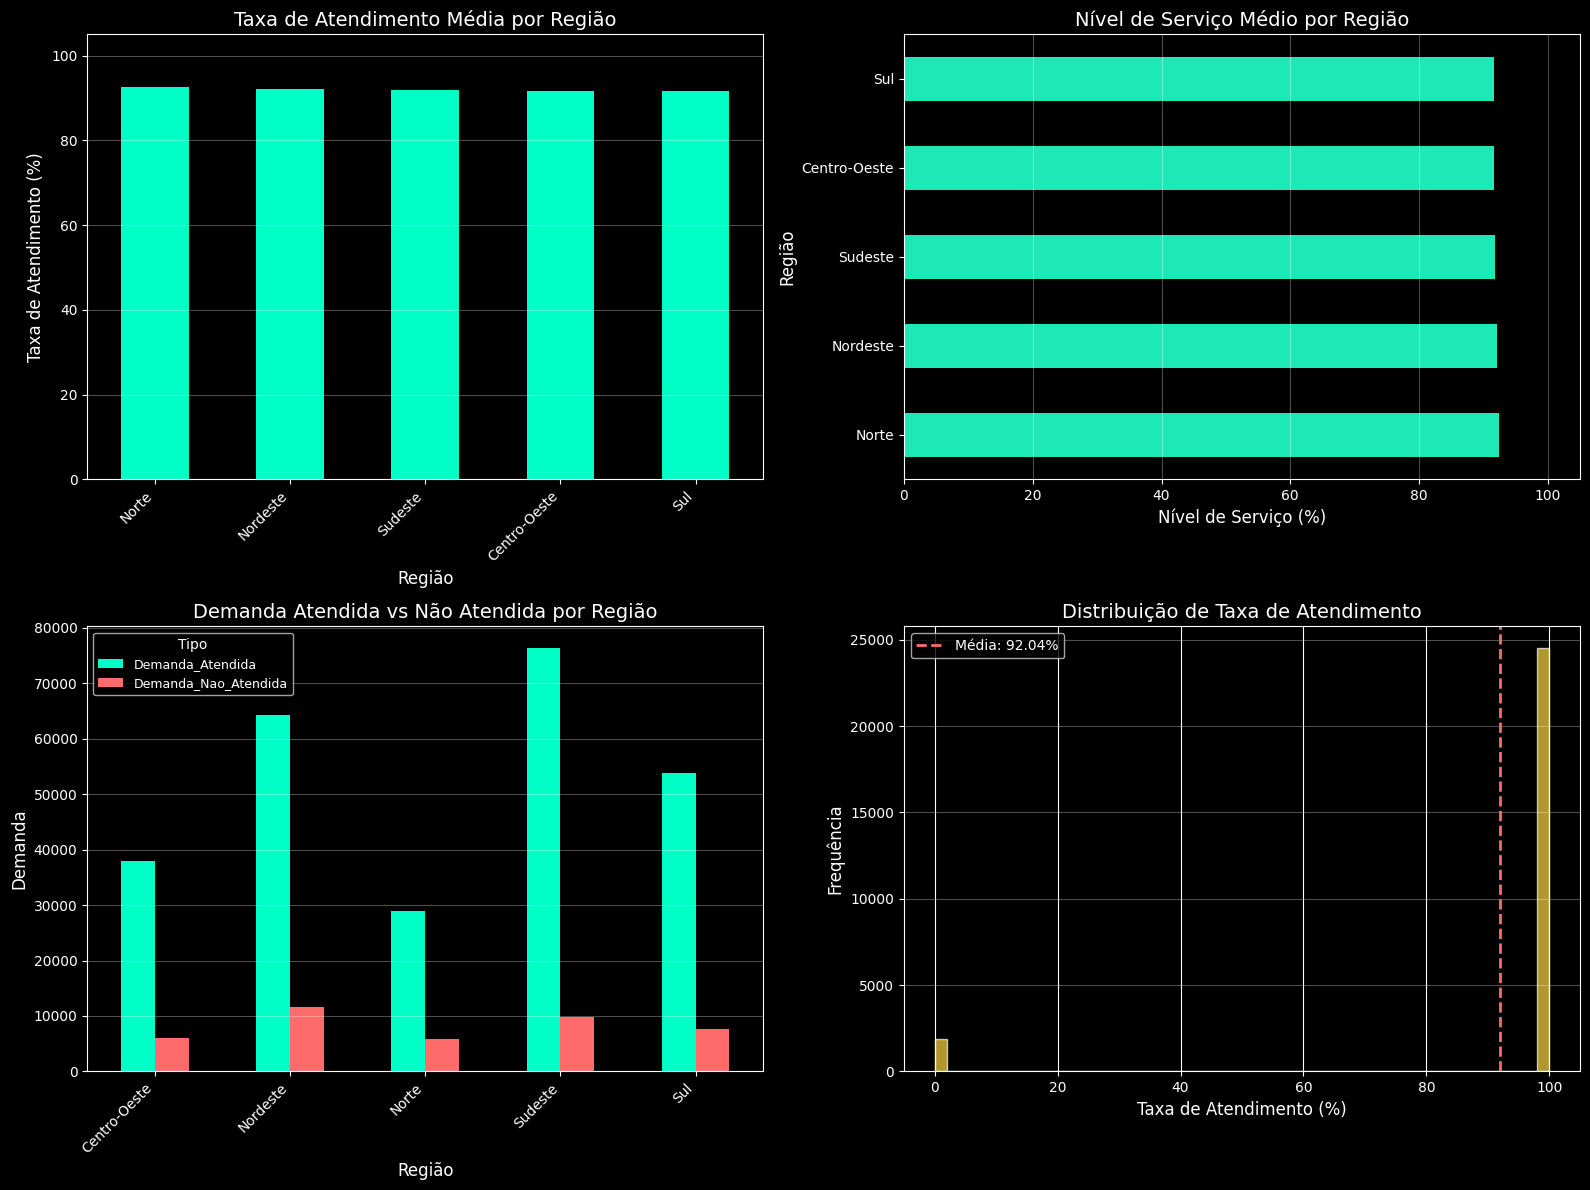

In [30]:
# Visualização: Atendimento e nível de serviço
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Taxa de atendimento média por região
ax1 = axes[0, 0]
taxa_atendimento = df.groupby('Regiao')['Taxa_Atendimento'].mean().sort_values(ascending=False)
taxa_atendimento.plot(kind='bar', ax=ax1, color='#00FFC6')
ax1.set_title('Taxa de Atendimento Média por Região', fontsize=14, color='white')
ax1.set_xlabel('Região', fontsize=12, color='white')
ax1.set_ylabel('Taxa de Atendimento (%)', fontsize=12, color='white')
ax1.tick_params(colors='white')
ax1.set_ylim([0, 105])
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.grid(alpha=0.3, axis='y')

# Gráfico 2: Nível de serviço médio por região
ax2 = axes[0, 1]
nivel_servico = df.groupby('Regiao')['Nivel_Servico'].mean().sort_values(ascending=False)
nivel_servico.plot(kind='barh', ax=ax2, color='#1DE9B6')
ax2.set_title('Nível de Serviço Médio por Região', fontsize=14, color='white')
ax2.set_xlabel('Nível de Serviço (%)', fontsize=12, color='white')
ax2.set_ylabel('Região', fontsize=12, color='white')
ax2.tick_params(colors='white')
ax2.set_xlim([0, 105])
ax2.grid(alpha=0.3, axis='x')

# Gráfico 3: Comparação Demanda Atendida vs Não Atendida
ax3 = axes[1, 0]
comparacao = df.groupby('Regiao')[['Demanda_Atendida', 'Demanda_Nao_Atendida']].sum()
comparacao.plot(kind='bar', ax=ax3, color=['#00FFC6', '#FF6B6B'])
ax3.set_title('Demanda Atendida vs Não Atendida por Região', fontsize=14, color='white')
ax3.set_xlabel('Região', fontsize=12, color='white')
ax3.set_ylabel('Demanda', fontsize=12, color='white')
ax3.tick_params(colors='white')
ax3.legend(title='Tipo', title_fontsize=10, fontsize=9)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax3.grid(alpha=0.3, axis='y')

# Gráfico 4: Distribuição de taxa de atendimento
ax4 = axes[1, 1]
df['Taxa_Atendimento'].hist(bins=50, ax=ax4, color='#FFD93D', alpha=0.7, edgecolor='white')
ax4.axvline(df['Taxa_Atendimento'].mean(), color='#FF6B6B', linestyle='--', linewidth=2, 
            label=f'Média: {df["Taxa_Atendimento"].mean():.2f}%')
ax4.set_title('Distribuição de Taxa de Atendimento', fontsize=14, color='white')
ax4.set_xlabel('Taxa de Atendimento (%)', fontsize=12, color='white')
ax4.set_ylabel('Frequência', fontsize=12, color='white')
ax4.tick_params(colors='white')
ax4.legend()
ax4.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 7. Análise Temporal


In [31]:
# Preparar dados temporais
df['Ano'] = df['Data'].dt.year
df['Mes'] = df['Data'].dt.month
df['Ano_Mes'] = df['Data'].dt.to_period('M')

# Agregar por mês
tendencia_mensal = df.groupby('Ano_Mes').agg({
    'Demanda_Diaria': 'sum',
    'Estoque_Final': 'mean',
    'Stock_Out': 'sum',
    'Taxa_Atendimento': 'mean',
    'Reabastecimento': 'sum'
}).reset_index()

tendencia_mensal['Ano_Mes_Str'] = tendencia_mensal['Ano_Mes'].astype(str)

print("Tendência Mensal (primeiras 10 linhas):")
print(tendencia_mensal.head(10))


Tendência Mensal (primeiras 10 linhas):
   Ano_Mes  Demanda_Diaria  Estoque_Final  Stock_Out  Taxa_Atendimento  \
0  2020-02               3         430.00          0            100.00   
1  2020-03             596         180.96          0            100.00   
2  2020-04            1604         119.36          0            100.00   
3  2020-05            4597         116.15        326             97.18   
4  2020-06            9099         118.32       1230             89.65   
5  2020-07           12061         118.39       1660             86.82   
6  2020-08           11298         115.32       1319             86.84   
7  2020-09            8950         132.41        997             92.43   
8  2020-10            7308         141.89        384             94.75   
9  2020-11            7751         121.05        685             94.77   

   Reabastecimento Ano_Mes_Str  
0                0     2020-02  
1                0     2020-03  
2              508     2020-04  
3            

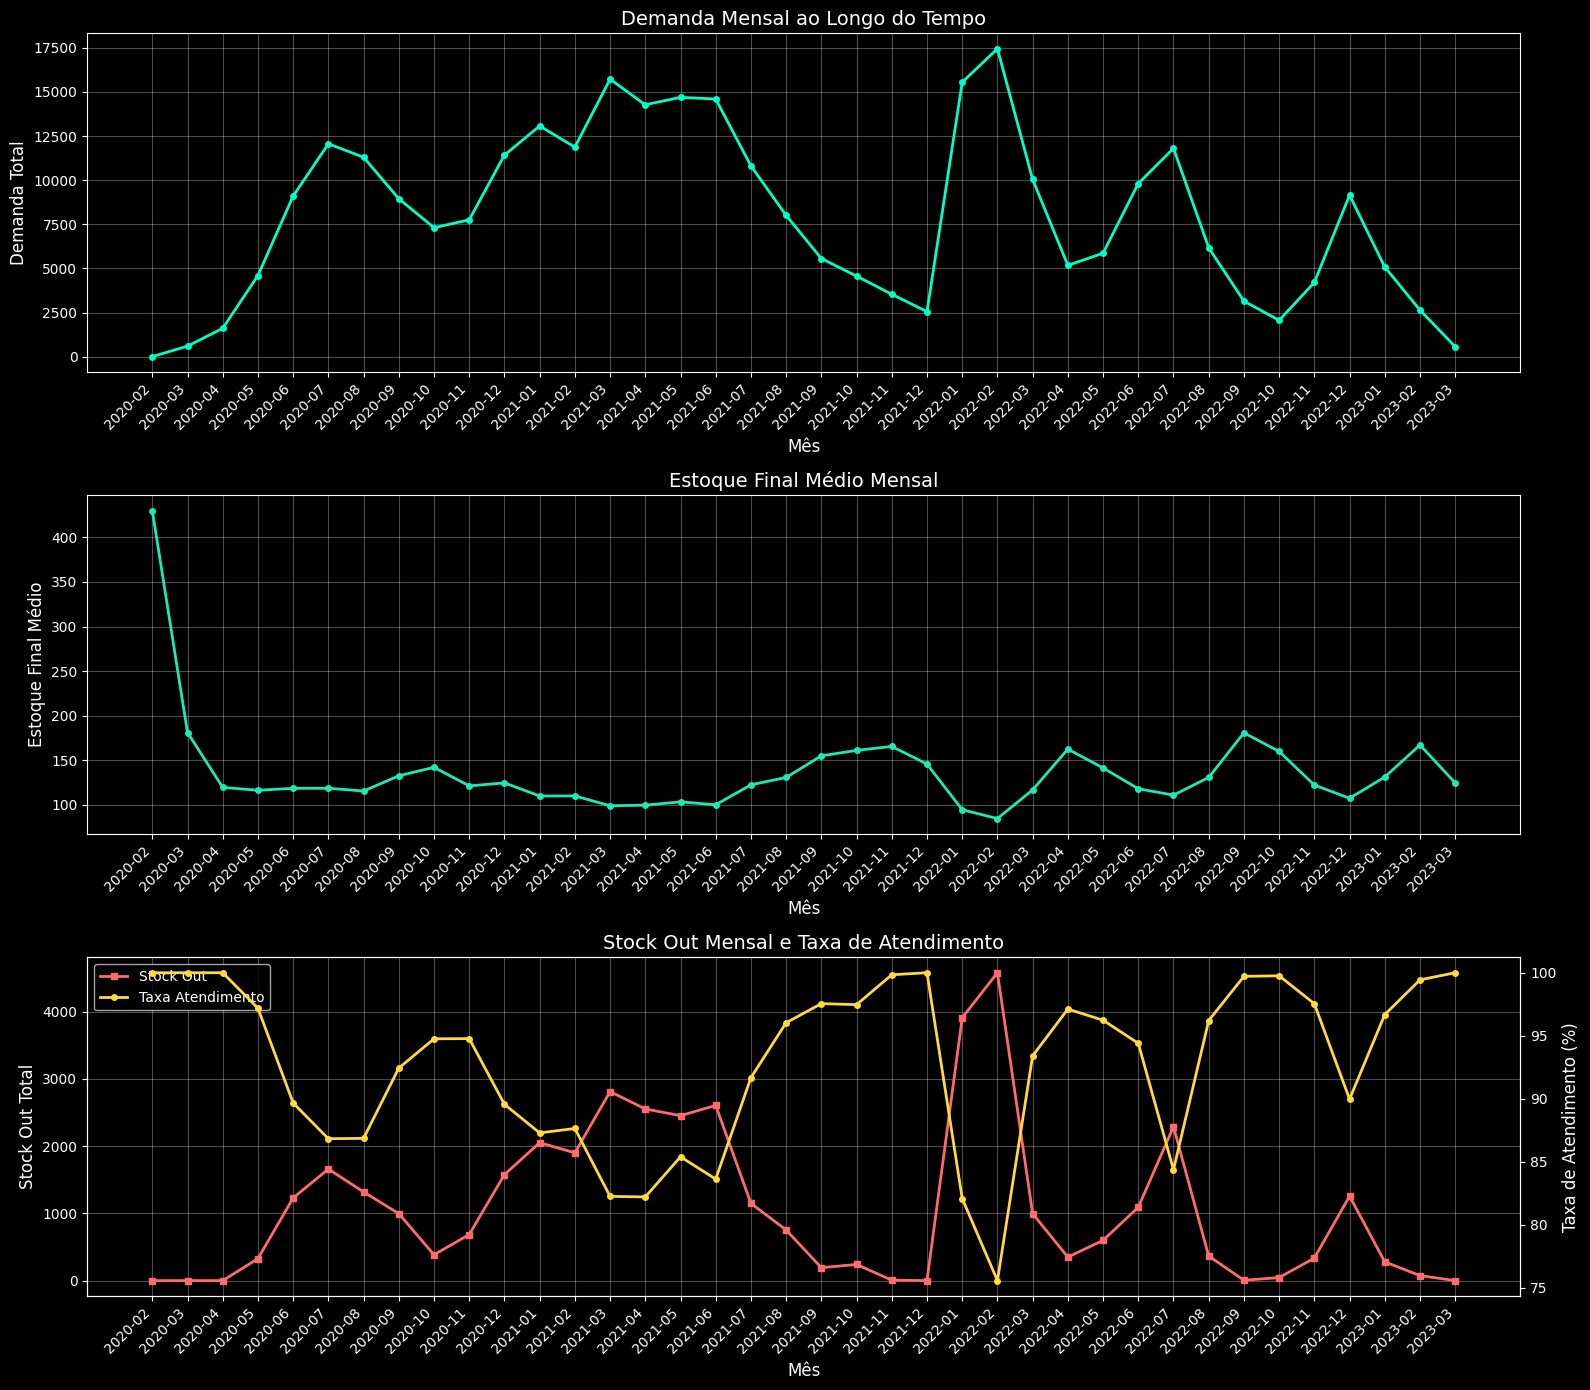

In [32]:
# Visualização: Tendências temporais
fig, axes = plt.subplots(3, 1, figsize=(16, 14))

# Gráfico 1: Demanda mensal ao longo do tempo
ax1 = axes[0]
ax1.plot(tendencia_mensal['Ano_Mes_Str'], tendencia_mensal['Demanda_Diaria'], 
         marker='o', linewidth=2, color='#00FFC6', markersize=4)
ax1.set_title('Demanda Mensal ao Longo do Tempo', fontsize=14, color='white')
ax1.set_xlabel('Mês', fontsize=12, color='white')
ax1.set_ylabel('Demanda Total', fontsize=12, color='white')
ax1.tick_params(colors='white')
ax1.grid(alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Gráfico 2: Estoque médio mensal
ax2 = axes[1]
ax2.plot(tendencia_mensal['Ano_Mes_Str'], tendencia_mensal['Estoque_Final'], 
         marker='o', linewidth=2, color='#1DE9B6', markersize=4)
ax2.set_title('Estoque Final Médio Mensal', fontsize=14, color='white')
ax2.set_xlabel('Mês', fontsize=12, color='white')
ax2.set_ylabel('Estoque Final Médio', fontsize=12, color='white')
ax2.tick_params(colors='white')
ax2.grid(alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Gráfico 3: Stock out mensal e taxa de atendimento
ax3 = axes[2]
ax3_twin = ax3.twinx()

line1 = ax3.plot(tendencia_mensal['Ano_Mes_Str'], tendencia_mensal['Stock_Out'], 
                 marker='s', linewidth=2, color='#FF6B6B', markersize=4, label='Stock Out')
line2 = ax3_twin.plot(tendencia_mensal['Ano_Mes_Str'], tendencia_mensal['Taxa_Atendimento'], 
                      marker='o', linewidth=2, color='#FFD93D', markersize=4, label='Taxa Atendimento')

ax3.set_title('Stock Out Mensal e Taxa de Atendimento', fontsize=14, color='white')
ax3.set_xlabel('Mês', fontsize=12, color='white')
ax3.set_ylabel('Stock Out Total', fontsize=12, color='white')
ax3_twin.set_ylabel('Taxa de Atendimento (%)', fontsize=12, color='white')
ax3.tick_params(colors='white')
ax3_twin.tick_params(colors='white')
ax3.grid(alpha=0.3)

# Legenda combinada
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax3.legend(lines, labels, loc='upper left')

plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


## 8. Análise por Estado


In [33]:
# Ranking de estados por diferentes métricas
print("="*60)
print("RANKING DE ESTADOS")
print("="*60)

# Top 10 estados com maior demanda
print("\n📊 Top 10 Estados - Maior Demanda Total:")
top_demanda = df.groupby('Estado')['Demanda_Diaria'].sum().sort_values(ascending=False).head(10)
print(top_demanda)

# Top 10 estados com maior stock out
print("\n⚠️ Top 10 Estados - Maior Stock Out Total:")
top_stock_out = df.groupby('Estado')['Stock_Out'].sum().sort_values(ascending=False).head(10)
print(top_stock_out)

# Top 10 estados com melhor taxa de atendimento
print("\n✅ Top 10 Estados - Melhor Taxa de Atendimento:")
top_atendimento = df.groupby('Estado')['Taxa_Atendimento'].mean().sort_values(ascending=False).head(10)
print(top_atendimento)

# Top 10 estados com mais reabastecimentos
print("\n🔄 Top 10 Estados - Mais Reabastecimentos:")
top_reabastecimento = df.groupby('Estado')['Reabastecimento'].sum().sort_values(ascending=False).head(10)
print(top_reabastecimento)


RANKING DE ESTADOS

📊 Top 10 Estados - Maior Demanda Total:
Estado
SP    29891
MG    24345
PR    22085
RS    21167
RJ    20348
SC    18196
GO    17789
BA    17358
CE    12608
PE    12260
Name: Demanda_Diaria, dtype: int64

⚠️ Top 10 Estados - Maior Stock Out Total:
Estado
MG    3086
PR    2697
SP    2668
BA    2616
RS    2541
SC    2366
RJ    2097
ES    2031
GO    1894
PE    1841
Name: Stock_Out, dtype: int64

✅ Top 10 Estados - Melhor Taxa de Atendimento:
Estado
RN   93.69
AP   93.62
SP   92.84
RO   92.84
AL   92.57
AM   92.53
SE   92.47
AC   92.46
MA   92.39
RS   92.20
Name: Taxa_Atendimento, dtype: float64

🔄 Top 10 Estados - Mais Reabastecimentos:
Estado
SP    27004
MG    21316
PR    19557
RS    18840
RJ    18300
SC    15810
GO    15708
BA    14948
CE    10944
PE    10366
Name: Reabastecimento, dtype: int64


In [34]:
# Tabela resumo por estado
resumo_estados = df.groupby('Estado').agg({
    'Regiao': 'first',
    'Demanda_Diaria': 'sum',
    'Stock_Out': 'sum',
    'Taxa_Atendimento': 'mean',
    'Estoque_Final': 'mean',
    'Reabastecimento': 'sum',
    'Custo_Total_USD': 'sum'
}).round(2)

resumo_estados.columns = ['Regiao', 'Demanda_Total', 'Stock_Out_Total', 
                           'Taxa_Atendimento_Media', 'Estoque_Final_Medio',
                           'Total_Reabastecimentos', 'Custo_Total']

resumo_estados = resumo_estados.sort_values('Demanda_Total', ascending=False)

print("Resumo Completo por Estado:")
print(resumo_estados.to_string())


Resumo Completo por Estado:
              Regiao  Demanda_Total  Stock_Out_Total  Taxa_Atendimento_Media  Estoque_Final_Medio  Total_Reabastecimentos  Custo_Total
Estado                                                                                                                                
SP           Sudeste          29891             2668                   92.84               324.64                   27004 3,816,846.22
MG           Sudeste          24345             3086                   91.13               255.16                   21316 3,082,632.43
PR               Sul          22085             2697                   91.64               240.73                   19557 3,248,030.81
RS               Sul          21167             2541                   92.20               236.18                   18840 3,142,322.05
RJ           Sudeste          20348             2097                   91.88               230.33                   18300 2,564,199.34
SC               Sul       

## 9. Correlações e Relacionamentos


Matriz de Correlação:
                          Demanda_Diaria  Estoque_Final  Stock_Out  \
Demanda_Diaria                      1.00           0.18       0.36   
Estoque_Final                       0.18           1.00      -0.23   
Stock_Out                           0.36          -0.23       1.00   
Taxa_Atendimento                   -0.18           0.30      -0.75   
Nivel_Servico                      -0.18           0.30      -0.75   
Custo_Total_USD                     0.82           0.06       0.33   
Tempo_Medio_Entrega_Dias           -0.36          -0.42      -0.08   

                          Taxa_Atendimento  Nivel_Servico  Custo_Total_USD  \
Demanda_Diaria                       -0.18          -0.18             0.82   
Estoque_Final                         0.30           0.30             0.06   
Stock_Out                            -0.75          -0.75             0.33   
Taxa_Atendimento                      1.00           1.00            -0.22   
Nivel_Servico              

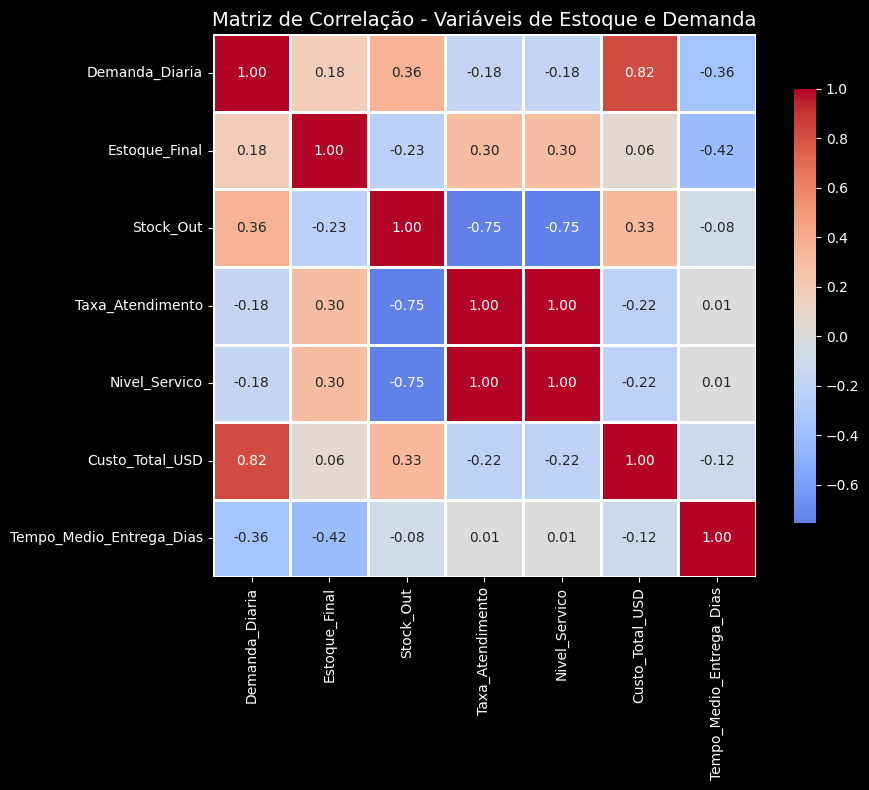

In [35]:
# Matriz de correlação entre variáveis principais
variaveis_correlacao = ['Demanda_Diaria', 'Estoque_Final', 'Stock_Out', 
                        'Taxa_Atendimento', 'Nivel_Servico', 'Custo_Total_USD',
                        'Tempo_Medio_Entrega_Dias']

correlacao = df[variaveis_correlacao].corr()

print("Matriz de Correlação:")
print(correlacao.round(2))

# Visualização
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Matriz de Correlação - Variáveis de Estoque e Demanda', 
             color='white', fontsize=14)
plt.tight_layout()
plt.show()


## 10. Insights e Conclusões


In [36]:
# Resumo executivo
print("="*60)
print("RESUMO EXECUTIVO - ANÁLISE DE DEMANDA E ESTOQUE")
print("="*60)

print(f"\n📊 DADOS GERAIS:")
print(f"  • Total de registros: {len(df):,}")
print(f"  • Período: {df['Data'].min().date()} a {df['Data'].max().date()}")
print(f"  • Total de estados: {df['Estado'].nunique()}")
print(f"  • Total de regiões: {df['Regiao'].nunique()}")

print(f"\n📦 DEMANDA:")
print(f"  • Demanda total: {df['Demanda_Diaria'].sum():,.0f} unidades")
print(f"  • Demanda média diária: {df['Demanda_Diaria'].mean():.2f} unidades")
print(f"  • Demanda atendida: {df['Demanda_Atendida'].sum():,.0f} unidades")
print(f"  • Demanda não atendida: {df['Demanda_Nao_Atendida'].sum():,.0f} unidades")

print(f"\n📊 ESTOQUE:")
print(f"  • Estoque final médio: {df['Estoque_Final'].mean():.2f} unidades")
print(f"  • Total de reabastecimentos: {df['Reabastecimento'].sum():,.0f} unidades")
print(f"  • Dias com estoque baixo: {(df['Indicador_Estoque_Baixo'] == 1).sum():,} dias")

print(f"\n⚠️ STOCK OUT:")
print(f"  • Stock out total: {df['Stock_Out'].sum():,.0f} unidades")
print(f"  • Percentual de stock out: {(df['Stock_Out'].sum() / df['Demanda_Diaria'].sum() * 100):.2f}%")
print(f"  • Dias com stock out: {(df['Indicador_Stock_Out'] == 1).sum():,} dias")
print(f"  • Percentual de dias com stock out: {(df['Indicador_Stock_Out'] == 1).sum() / len(df) * 100:.2f}%")

print(f"\n✅ ATENDIMENTO:")
print(f"  • Taxa média de atendimento: {df['Taxa_Atendimento'].mean():.2f}%")
print(f"  • Nível médio de serviço: {df['Nivel_Servico'].mean():.2f}%")

print(f"\n🏆 REGIÃO COM MAIOR DEMANDA:")
regiao_demanda = df.groupby('Regiao')['Demanda_Diaria'].sum().idxmax()
print(f"  • {regiao_demanda}: {df[df['Regiao'] == regiao_demanda]['Demanda_Diaria'].sum():,.0f} unidades")

print(f"\n⚠️ REGIÃO COM MAIOR STOCK OUT:")
regiao_stock_out = df.groupby('Regiao')['Stock_Out'].sum().idxmax()
print(f"  • {regiao_stock_out}: {df[df['Regiao'] == regiao_stock_out]['Stock_Out'].sum():,.0f} unidades")

print(f"\n✅ REGIÃO COM MELHOR ATENDIMENTO:")
regiao_atendimento = df.groupby('Regiao')['Taxa_Atendimento'].mean().idxmax()
print(f"  • {regiao_atendimento}: {df[df['Regiao'] == regiao_atendimento]['Taxa_Atendimento'].mean():.2f}%")

print("\n" + "="*60)


RESUMO EXECUTIVO - ANÁLISE DE DEMANDA E ESTOQUE

📊 DADOS GERAIS:
  • Total de registros: 27,029
  • Período: 2020-02-25 a 2023-03-18
  • Total de estados: 27
  • Total de regiões: 5

📦 DEMANDA:
  • Demanda total: 302,639 unidades
  • Demanda média diária: 11.20 unidades
  • Demanda atendida: 261,564 unidades
  • Demanda não atendida: 41,075 unidades

📊 ESTOQUE:
  • Estoque final médio: 126.52 unidades
  • Total de reabastecimentos: 261,309 unidades
  • Dias com estoque baixo: 4,795 dias

⚠️ STOCK OUT:
  • Stock out total: 41,075 unidades
  • Percentual de stock out: 13.57%
  • Dias com stock out: 2,482 dias
  • Percentual de dias com stock out: 9.18%

✅ ATENDIMENTO:
  • Taxa média de atendimento: 92.04%
  • Nível médio de serviço: 92.04%

🏆 REGIÃO COM MAIOR DEMANDA:
  • Sudeste: 86,339 unidades

⚠️ REGIÃO COM MAIOR STOCK OUT:
  • Nordeste: 11,700 unidades

✅ REGIÃO COM MELHOR ATENDIMENTO:
  • Norte: 92.46%

